In [1]:
import io
import math
import numpy as np
import matplotlib.pyplot as plt
from random import shuffle


In [2]:


#Définition des nucléotides
nucleotide = {'A':0,'C':1,'G':2,'T':3}
nucleotide_indetermine = {'A':0,'C':1,'G':2,'T':3,'N':-1}


In [3]:
def decode_sequence(sequence):
    inv_nucleotide = {v:k for k, v in nucleotide_indetermine.items()}
    to_str = ""
    for i in sequence:
        if(i in inv_nucleotide):
            to_str += inv_nucleotide[i]
        else:
            to_str += 'N'
    return to_str


In [4]:
def encode_sequence(string):
    to_list = []
    for base in string:
        if(base in nucleotide_indetermine):
            to_list.append(nucleotide_indetermine[base])
    return to_list


In [5]:
def read_fasta(fasta_filepath):
    fasta_file = io.open(fasta_filepath, 'r')
    current_sequence = ""
    sequences_dict = {}
    for line in fasta_file.readlines():
        if(line[0] == '>'):
            current_sequence = line
            sequences_dict[line] = []
        else:
            for nucl in line:
                if(nucl in nucleotide_indetermine):
                    sequences_dict[current_sequence].append(nucleotide_indetermine[nucl])

    return sequences_dict

In [6]:
def nucleotide_count(sequence):
    count = [0 for k in nucleotide]
    for nucl in sequence:
        if(nucl >= 0):
            count[nucl] += 1
    return count


In [7]:
def nucleotide_frequency(sequence):
    count = [0 for k in nucleotide]
    n_nucl = 0.
    for nucl in sequence:
        if(nucl >= 0):
            count[nucl] += 1
            n_nucl += 1.
    return count/(np.sum(count))

In [8]:
fichiers = ["regulatory_seq_PHO.fasta","regulatory_seqs_GAL.fasta","regulatory_seqs_MET.fasta"]

In [9]:
sequences = []
for i in fichiers:
    sequences.append(read_fasta(i))

### Nombre de nucleotides

In [14]:
s = 0
for i in sequences:
    for j in i: 
        s += sum(nucleotide_count(i[j]))

In [15]:
print("Le nombre de nucleotides est : " + str(s))

Le nombre de nucleotides est : 16808


### Les frequences des nucleotides sur tout le genome 

In [16]:
frequences, cpt = [ 0 for i in range(4)], 0
for i in sequences:
    for j in i: 
        f = nucleotide_frequency(i[j])
        frequences = [frequences[k] + f[k]  for k in range(4)]
        cpt += 1
frequences = [frequences[i]/ cpt for i in range(4)]

In [17]:
frequences

[0.3174180810938237,
 0.19621581801037247,
 0.18651166902404523,
 0.29985443187175853]

### Méthode logproba

In [18]:
def logproba(liste_entiers, m):
    logproba = 0
    for i in liste_entiers:
        logproba += math.log(m[i])
    return logproba

In [19]:
#Exemple enonce
logproba( [1,0,3],[0.2,0.3,0.1,0.4])

-3.7297014486341915

In [20]:
for i in sequences:
    for j in i: 
        print(" sequence : " + str(j[1: 6]) + " proba : " + str(logproba( i[j],frequences)))

 sequence : PHO81 proba : -1079.6173027612112
 sequence : PHO5	 proba : -1091.9232848646043
 sequence : PHO11 proba : -1074.6054223844944
 sequence : PHO8	 proba : -1111.080510044709
 sequence : PHO84 proba : -1090.0104979406437
 sequence : GAL1	 proba : -1078.72344769417
 sequence : GAL80 proba : -1107.7440788706408
 sequence : GAL10 proba : -1081.3145089136347
 sequence : GAL7	 proba : -1080.0870159002422
 sequence : GAL2	 proba : -1091.695887058259
 sequence : GAL3	 proba : -1089.4081028658659
 sequence : GCY1	 proba : -1108.7057536315115
 sequence : MET1	 proba : -1071.7412193101777
 sequence : MET6	 proba : -1085.560358775352
 sequence : SAM1	 proba : -1094.860912162886
 sequence : MUP3	 proba : -1092.2056758839767
 sequence : MET3	 proba : -1068.370148009796
 sequence : SAM2	 proba : -1082.4269855795349
 sequence : MET14 proba : -1073.1925966453148
 sequence : MET2	 proba : -1074.7931574972254
 sequence : MET30 proba : -1104.731975914942


In [21]:
sequences

[{'>PHO11\tPHO11; upstream from -800 to -1; size: 800; feature type:cds; location: Saccharomyces_cerevisiae:NC_001133.7:224651:225450:D\n': [2,
   1,
   0,
   2,
   1,
   1,
   3,
   1,
   3,
   0,
   1,
   1,
   0,
   3,
   2,
   3,
   3,
   2,
   1,
   0,
   0,
   2,
   3,
   2,
   1,
   2,
   0,
   0,
   1,
   1,
   0,
   3,
   0,
   1,
   3,
   2,
   3,
   2,
   2,
   1,
   1,
   0,
   1,
   0,
   3,
   0,
   2,
   0,
   3,
   3,
   0,
   1,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   2,
   3,
   1,
   1,
   0,
   2,
   2,
   0,
   3,
   0,
   3,
   1,
   3,
   3,
   2,
   1,
   0,
   0,
   0,
   1,
   1,
   3,
   0,
   2,
   1,
   3,
   3,
   2,
   3,
   3,
   3,
   3,
   2,
   3,
   0,
   0,
   0,
   1,
   2,
   0,
   1,
   0,
   3,
   3,
   2,
   0,
   0,
   0,
   0,
   0,
   0,
   2,
   1,
   2,
   3,
   0,
   3,
   3,
   0,
   0,
   2,
   2,
   3,
   2,
   0,
   0,
   0,
   1,
   0,
   0,
   3,
   1,
   0,
   0,
   2,
   0,
   3,
   3,
   0,
   3,
   1,
   3,
   0,
   3,
   2

### Optimisation : logprobafast

In [22]:
def logprobafast (count, m):
    logproba = 0
    for i in range(len(count)):
        logproba += count[i] * math.log(m[i])
    return logproba

In [23]:
#Exemple enonce
logprobafast( nucleotide_count([1,0,3]),[0.2,0.3,0.1,0.4])

-3.7297014486341915

In [24]:
for i in sequences:
    for j in i: 
        print(" sequence : " + str(j[1: 6]) + " proba : " + str(logprobafast( nucleotide_count(i[j]),frequences)))

 sequence : PHO81 proba : -1079.6173027612083
 sequence : PHO5	 proba : -1091.9232848646004
 sequence : PHO11 proba : -1074.6054223844912
 sequence : PHO8	 proba : -1111.0805100447026
 sequence : PHO84 proba : -1090.0104979406412
 sequence : GAL1	 proba : -1078.7234476941667
 sequence : GAL80 proba : -1107.7440788706378
 sequence : GAL10 proba : -1081.3145089136306
 sequence : GAL7	 proba : -1080.0870159002384
 sequence : GAL2	 proba : -1091.6958870582541
 sequence : GAL3	 proba : -1089.4081028658638
 sequence : GCY1	 proba : -1103.887921034784
 sequence : MET1	 proba : -1071.741219310176
 sequence : MET6	 proba : -1085.5603587753474
 sequence : SAM1	 proba : -1094.8609121628824
 sequence : MUP3	 proba : -1092.205675883973
 sequence : MET3	 proba : -1068.370148009793
 sequence : SAM2	 proba : -1082.426985579531
 sequence : MET14 proba : -1073.1925966453116
 sequence : MET2	 proba : -1074.7931574972235
 sequence : MET30 proba : -1104.7319759149377


## Partie 3.1 Description Empirique, préliminaires

In [25]:
def code(m, k):
    indice = 0
    for i in range(len(m)) :
        indice += m[i] * 4 ** (k -i -1)
    return indice


In [26]:
#Exemple enonce
code([3,0,1],3)

49

In [27]:
#exemple pour des parties des sequences de taille 10
for i in sequences:
    for j in i: 
        print(" sequence : " + str(j[1: 6]) + " proba : " + str(code( i[j][10: 20],10)))

 sequence : PHO81 proba : 568260
 sequence : PHO5	 proba : 427916
 sequence : PHO11 proba : 343012
 sequence : PHO8	 proba : 260095
 sequence : PHO84 proba : 250048
 sequence : GAL1	 proba : 590865
 sequence : GAL80 proba : 785951
 sequence : GAL10 proba : 864409
 sequence : GAL7	 proba : 36795
 sequence : GAL2	 proba : 652552
 sequence : GAL3	 proba : 260735
 sequence : GCY1	 proba : 478675
 sequence : MET1	 proba : 200571
 sequence : MET6	 proba : 251391
 sequence : SAM1	 proba : 879314
 sequence : MUP3	 proba : 559623
 sequence : MET3	 proba : 1035279
 sequence : SAM2	 proba : 176116
 sequence : MET14 proba : 246979
 sequence : MET2	 proba : 724017
 sequence : MET30 proba : 269839


#### Question3.1.1.b

In [28]:
def inverse(i, k):
    s =[]
    j=k-1
    while( j >= 0):
        s.append(int(i/ (4 ** (j))))
        i = i % (4 ** (j))
        j-=1
    return s
                 

In [29]:
inverse (49,3)

[3, 0, 1]

#### Question3.1.1.c

In [30]:
def comptage_obs (seq,k):
    mots = {key: 0 for key in range(4**k)}
    for i in range(len(seq)-k+1):
        c = code(seq[i:i+k],k)
        if c in mots :
            mots[c] +=1 
        else:
            mots[c] =1
    return mots

In [31]:
comptage_obs ([1,0,2,1,0,3],2)

{0: 0,
 1: 0,
 2: 1,
 3: 1,
 4: 2,
 5: 0,
 6: 0,
 7: 0,
 8: 0,
 9: 1,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 0,
 15: 0}

In [32]:
def comptage_attendu (freq_nucl,k,l):
    mots = {}
    for i in range(4 ** k):
        m = inverse(i,k)
        mots[i] = (l-k+1)*math.exp(logproba(m,freq_nucl))
    return mots

In [33]:
comptage_attendu ([0.88,0.01,0.1,0.01],2,5)

{0: 3.0976,
 1: 0.035200000000000016,
 2: 0.3520000000000001,
 3: 0.035200000000000016,
 4: 0.035200000000000016,
 5: 0.00040000000000000034,
 6: 0.004000000000000001,
 7: 0.00040000000000000034,
 8: 0.3520000000000001,
 9: 0.004000000000000001,
 10: 0.040000000000000015,
 11: 0.004000000000000001,
 12: 0.035200000000000016,
 13: 0.00040000000000000034,
 14: 0.004000000000000001,
 15: 0.00040000000000000034}

Le nombre attendu d'occurences pour un mot $W$ dans une sequence de longeur $l$ est : $$ P(W) = \Pi_{i=0}^{|W|}{P(W_i)} * (l-|W|-1) $$ 

##### Graphique comparatif nombre observé / nombre attendu

In [34]:
def graphique (name_seq, K):
    att, obs = [], []
    les_sequences = []
    cmpt_Att, cmpt_Obs = {}, {}
    #concatenation des sequences PHO par exemple
    for i in sequences:
        for j in i: 
            if j[1: 4] == name_seq:
                les_sequences.append(i[j])
    
    for seq in les_sequences:
        freq = nucleotide_frequency(seq)
        cmpt_att= comptage_attendu (freq,K,len(seq))
        cmpt_obs= comptage_obs (seq,K)
        for r in cmpt_att:
            if r in cmpt_Att:
                cmpt_Att[r] +=cmpt_att[r]
                cmpt_Obs[r] +=cmpt_obs[r]
            else:
                cmpt_Att[r] =cmpt_att[r]
                cmpt_Obs[r] =cmpt_obs[r]
    for r in cmpt_Att:
            att.append(cmpt_Att[r])
            obs.append(cmpt_Obs[r])
    fig, ax = plt.subplots()
    
    ax.scatter(att,obs,c= "r")
    """lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]

    # now plot both limits against eachother
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    ax.set_aspect('equal')
    ax.set_xlim(lims)
    ax.set_ylim(lims)"""
    #plt.title('Nuage de points du nombre d\'occurences attendu et observé des mots de longueur k= ' + str(i))
    plt.xlabel('le nombre attendu')
    plt.ylabel('le nombre observé')
    plt.show()
    

#### Les sequences PHO 

K = 2

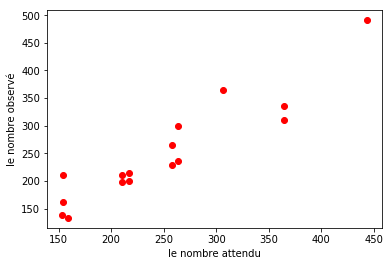

In [31]:
graphique("PHO", 2)

K = 4

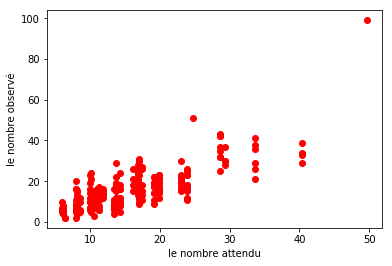

In [32]:
graphique("PHO", 4)

K = 6

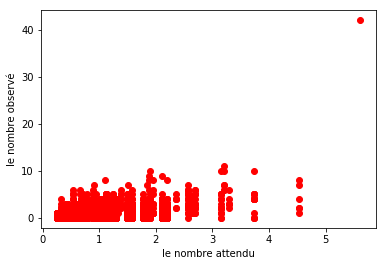

In [33]:
graphique("PHO", 6)

K = 8

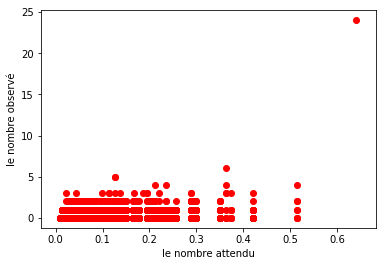

In [34]:
graphique("PHO", 8)

### Les sequences GAL

K = 2

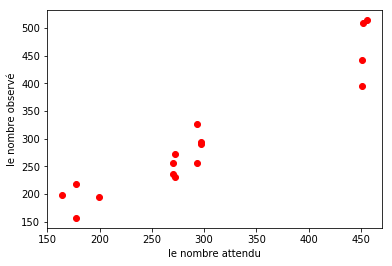

In [36]:
graphique("GAL", 2)

K = 4

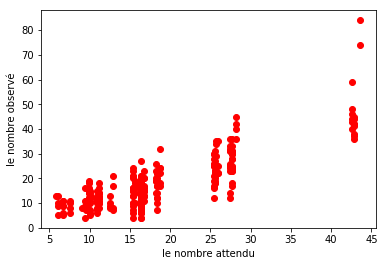

In [37]:
graphique("GAL", 4)

K = 6

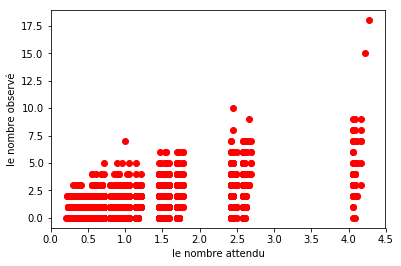

In [38]:
graphique("GAL", 6)

K = 8

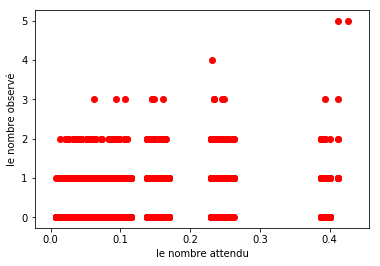

In [39]:
graphique("GAL", 8)

# 3.2 Simulation de séquences aléatoires

In [35]:
#Fonction qui etant donnee une distribution genere une sequence aleatoi de taille lg
def simule_sequence(lg, m):
    r = []
    for i in range (4):#pour chaque lettre
        for j in range (int(round(m[i] * lg ))):#  generer p(a) * lg lettres
            if (len(r)<lg):
                r.append (i)
    shuffle(r)# on melange tout
    return  r
        

In [36]:
simule_sequence(8, [0.1,0.2,0.6,0.1])

[2, 2, 1, 0, 2, 2, 1, 2]

In [37]:
list(comptage_attendu ([0.1,0.2,0.6,0.1],2,8).values())

[0.07000000000000002,
 0.14000000000000007,
 0.42,
 0.07000000000000002,
 0.14000000000000007,
 0.28,
 0.8400000000000001,
 0.14000000000000007,
 0.42,
 0.8400000000000001,
 2.52,
 0.42,
 0.07000000000000002,
 0.14000000000000007,
 0.42,
 0.07000000000000002]

#### Simulation de séquences pour comparer le comptage attendu et observé

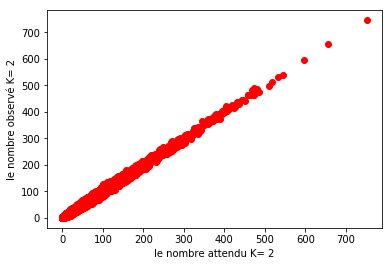

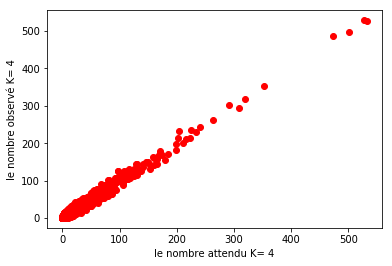

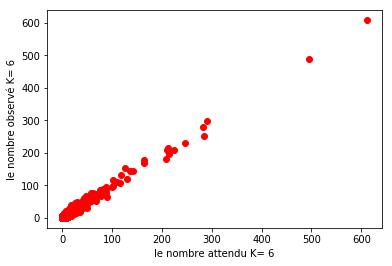

In [38]:
#Simulation ensemble de sequences

for k in [2,4,6]:
    cpt_Att = []
    cpt_Obs = []
    for i in range (1000):
        #Generer des frequences aleatoirement
        freq = np.random.rand(4)#des nombres aleatoires
        freq_nucl = freq / sum(freq) # ca somme a 1 en divisant tout par la somme 
        s = simule_sequence(1000,freq_nucl)
        cpt_Att.append(list(comptage_attendu (freq_nucl,k,len(s)).values()))
        cpt_Obs.append(list(comptage_obs(s,k).values()))         
    fig, ax = plt.subplots()
    ax.scatter(cpt_Att,cpt_Obs,c= "r")
    #plt.title('Nuage de points du nombre d\'occurences attendu et observé des mots de longueur k= ' + str(i))
    plt.xlabel('le nombre attendu K= ' + str(k))
    plt.ylabel('le nombre observé K= ' + str(k))
    plt.show()
        
        


**On constate que le nombre attendu et observé diminue avec l'augmentation de la logueur du mot mais que les points restent sur le droite y = x autrement dit que l'estimation reste correcte** 

### Estimation de la probabilité d'observer un mot n fois dans une séquence de longueur l

In [39]:
#Fonction de probabilité enpirique d'un mot n fois dans sequence de longueur l
def proba_empirique_mot (w,l,n):
    p = 0.0
    for i in range (100):
        freq = np.random.rand(4)#des nombres aleatoires
        freq_nucl = freq / sum(freq) # ca somme a 1 en divisant tout par la somme 
        s = simule_sequence(l,freq_nucl)
        motCode = code (w,len(w))
        cpt_obs = comptage_obs(s,len(w))
        if cpt_obs [motCode] >= n:
            p+=1
    p = p /100
    return p

In [60]:
proba_empirique_mot ([0,3,1,3,2,1],1000,2)

0.01

In [61]:
proba_empirique_mot ([0,3,0,3,0,3],1000,2)

0.04

In [62]:
proba_empirique_mot ([3,3,3,0,0,0],1000,2)

0.1

In [63]:
proba_empirique_mot ([0,0,0,0,0,0],1000,2)

0.26

On remarque qu'il existe des mots plus probables que d'autres

### Histogrammes de la distribution du comptage des mots

In [74]:
def dist_proba(w):
    x = []
    y = []
    # Generate a normal distribution, center at x=0 and y=5
    for i  in range (1,100):
        x.append(i)
        y.append(proba_empirique_mot (w,1000,i))
    plt.legend(["n", "probabilité empirique"])
    plt.bar(x,y)

**AAAAAA**

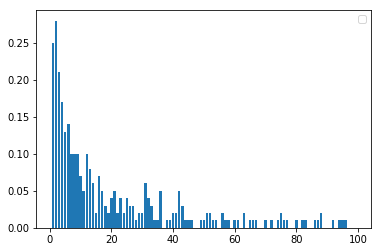

In [75]:
dist_proba([0,0,0,0,0,0])

**TTTAAA**

<BarContainer object of 99 artists>

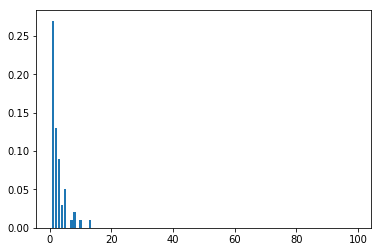

In [71]:
dist_proba([3,3,3,0,0,0])

**ATATAT**

<BarContainer object of 99 artists>

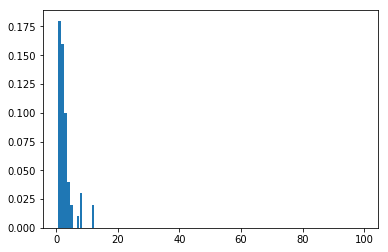

In [69]:
dist_proba([0,3,0,3,0,3])

**ATCTGC**

<BarContainer object of 99 artists>

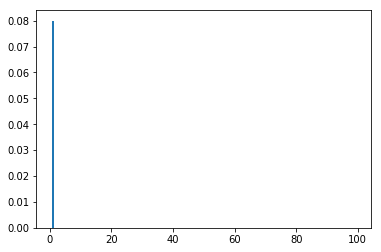

In [70]:
dist_proba([0,3,1,3,2,1])

### Observations : 
On remarque des différences en fonction des mots. Le mot AAAAA est bien plus representé que les autres.

On remarque aussi que pour des mots ayant la même probabilité d'apparaître tel que **ATATAT** et **TTTAAA**, nous avons des distributions de même type mais avec des paramètres différents. Celà se justifie par le fait qu'estimer la probabilité d'un mot par la probabilité de ses nucleotides en supposant l'indépendance dans l'apparition de nucléotides n'est pas très correct.

### Calcul d'intervalle de confiance pour la probabilité empirique

On determine d'abord le risque $\alpha$,  la probabilité empirique sera alors entre 
On génére une distribution de comptages de mots (>100) et on calcule la probabilité moyenne $\bar{X}$  d'apparition et l'ecart type estimé $S$ .

l'intervalle de confiance $$ IC = [\bar{X} - z_{\alpha} \frac{S}{\sqrt{n}}, \bar{X} + z_{\alpha} \frac{S}{\sqrt{n}}]$$

## 3.3 Modèles de dinucléotides et trinucléotides

### question 1
Oui, celà correspond à un processus stochastique homogène et verifiant la propriété de Markov d'ordre 1 donc c'est bien une chaine de markov d'ordre 1. 

Cette chaine de markov est aperiodique car il est possible de boucler sur un etat ($P(A|A) > 0$), elle est également irreductible car tous les états sont liés, il n'existe donc pas d'état transient ou absorbant, de ce fait il existe une unique distribution de probabilités qui verifie $$\pi^{*} = \pi^{*} M $$ 

In [40]:
def proba_jointe(i, j, comptages):
    return comptages[i *4 +j] 

In [41]:
def prob_tot(i, comp):
    
    return sum(list(comp[i*4: i*4 +4]))

In [42]:
def M(comptage):
    matrice = np.zeros((4,4))
    somme = sum(comptage.values())
    liste = [i / somme for i in comptage.values()]
    for i in range(len(liste)):
        pos1, pos2 = int(i/4), i%4
        matrice[pos1][pos2] = proba_jointe(pos1, pos2, liste) / prob_tot(pos1, liste)        
    return matrice

In [43]:
les_sequences = []
for i in sequences:
        for j in i: 
            if j[1: 4] == 'PHO':
                les_sequences.append(i[j])


In [44]:
M(comptage_obs (les_sequences[0],2))

array([[0.332     , 0.184     , 0.192     , 0.292     ],
       [0.37931034, 0.14482759, 0.15862069, 0.31724138],
       [0.28275862, 0.28275862, 0.15862069, 0.27586207],
       [0.27413127, 0.14285714, 0.1969112 , 0.38610039]])

### calcul de la distribution de probabilités stationnaire

In [45]:
def probaStationnaire( A ):
    n = A.shape[0]
    a = np.eye( n ) - A
    a = np.vstack( (a.T, np.ones( n )) )
    b = np.matrix( [0] * n + [ 1 ] ).T
    return (np.linalg.lstsq( a, b )[0]).T.tolist()[0]

In [64]:
probaStationnaire(M(comptage_obs (les_sequences[0],2)))

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


[0.3354192740926161,
 0.22778473091364193,
 0.17021276595744667,
 0.26658322903629517]

In [29]:
sum(M(comptage_obs (les_sequences[0],2))[0])

1.0

### Simuler une sequence longueur l avec le modele de dinucluotide

In [46]:
from numpy.random import choice


In [47]:
#Ecrire une fonction qui simule une séquence de longueur ` avec le modèle de dinucléotides.
def simule(comptages, l, freq):
    r = []
    matrice = M(comptages)  
    r.append([0,1,2,3][np.argmax(freq)])
    for i in range(1, l):
        r.append(choice([0,1,2,3], 1,p=matrice[r[i-1]])[0])
    return r
    

In [49]:
simule(comptage_obs (les_sequences[0],2), 20, nucleotide_frequency(les_sequences[0]))

[3, 1, 2, 3, 1, 3, 3, 3, 0, 1, 2, 0, 0, 0, 0, 2, 3, 3, 3, 2]

In [50]:
def proba_dinucl(W, pos, seq):
    matrice = M(comptage_obs (seq,2)) 
    if pos > 0:
        s = seq[pos  -1]
        proba = 1
        for i in W:
            proba *= matrice[s][i]
            s = i
        return proba
    else:
        proba = nucleotide_frequency(seq)[W[0]]
        for i in range(1, len(W)):
            proba *= matrice[s][W[i]]
            s = W[i]
        return proba

In [55]:
proba_dinucl([0,1,3,2],2, les_sequences[0] )

0.003164108630051985

#### Le  nombre  attendu  d’occurrences  pour  un  mot  de  longueur k avec le modèle de dinucléotides

In [51]:
def comptage_attendu_dinucl (seq, freq_nucl,k):
    mots = {}
    pS = probaStationnaire(M(comptage_obs(seq,2)) )
    for i in range(4 ** k):
        m = inverse(i,k)
        mots[i] = pS[m[0]] * (len(seq) - k + 1)
        for j in range(1, len(m)):
            mots[i] *= pS[m[j]]
        
    return mots

In [69]:
comptage_attendu_dinucl(les_sequences[0], nucleotide_frequency(les_sequences[0]), 2)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


{0: 89.89236545682122,
 1: 61.046307884856105,
 2: 45.61702127659576,
 3: 71.44430538172718,
 4: 61.046307884856105,
 5: 41.45682102628281,
 6: 30.97872340425528,
 7: 48.5181476846057,
 8: 45.61702127659576,
 9: 30.978723404255277,
 10: 23.14893617021273,
 11: 36.25531914893611,
 12: 71.44430538172718,
 13: 48.518147684605694,
 14: 36.25531914893611,
 15: 56.78222778473082}

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


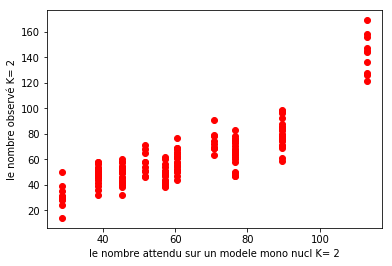

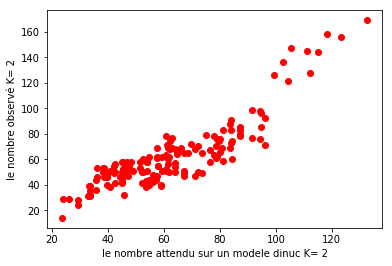

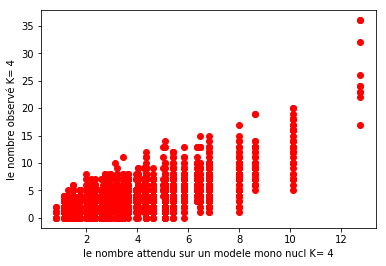

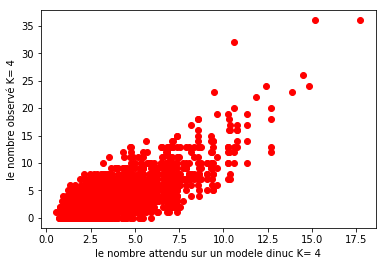

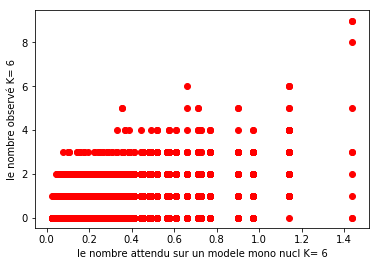

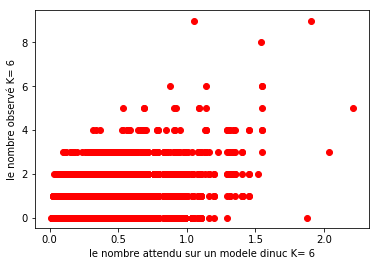

In [81]:
for k in [2,4,6]:
    cpt_AttDi = []
    cpt_Obs = []
    cpt_Att_mono = []
    comptages = comptage_obs(les_sequences[0], 2)
    freq = nucleotide_frequency(les_sequences[0])
    for i in range (10):
        #Generer des frequences aleatoirement
         # ca somme a 1 en divisant tout par la somme 
        s = simule(comptages, 1000, freq)
        cpt_Att_mono.append(list(comptage_attendu (freq,k,len(s)).values()))
        cpt_Obs.append(list(comptage_obs(s,k).values()))
        cpt_AttDi.append(list(comptage_attendu_dinucl(s, freq, k).values()))
    fig, ax = plt.subplots()
    ax.scatter(cpt_Att_mono,cpt_Obs,c= "r")
    #plt.title('Nuage de points du nombre d\'occurences attendu et observé des mots de longueur k= ' + str(i))
    plt.xlabel('le nombre attendu sur un modele mono nucl K= ' + str(k))
    plt.ylabel('le nombre observé K= ' + str(k))
    plt.show()
    fig, ax = plt.subplots()
    ax.scatter(cpt_AttDi,cpt_Obs,c= "r")
    #plt.title('Nuage de points du nombre d\'occurences attendu et observé des mots de longueur k= ' + str(i))
    plt.xlabel('le nombre attendu sur un modele dinuc K= ' + str(k))
    plt.ylabel('le nombre observé K= ' + str(k))
    plt.show()
        
        


#### Analyse 
Sur un modèle de nucléotides tous les mots composés des mêmes lettres ont la même probabilité ( multiplication des probabilité de chaque lettre) alors que sur un modèle de dinucléotides on prend en compte la probabilité conditionnelle d'avoir une lettre donnée sachant la lettre qui la précède ce qui est beaucoup plus réaliste (on ne suppose plus l'independance des distributions des lettres). De ce fait on observe une plus grande correlation entre le nombre observé et l'estimation faite par un modèle dinuclotidale que par un modèle de nucléotide. Cependant ce n'est vrai que pour des valeurs de k très proches de 2 (2,3,4) quand k est plus grand les deux modèles sont tout aussi insignifiants.

### La distribution du nombre d’occurrences quand les mots ne se chevauchent  pas

$$ N(W) = P(W_0) \Pi_{i=1}^{k}{P(W_i|W_{i-1})} * (l-k+1) $$

# 3.4 Probabilités de mots

### Approximation de la probabilité d’avoir un mot w qui apparait n fois dans une séquence aléatoire 

Les paramètres de la loi binomiale sont $p = P(W) $ et $n = l-k+1$

In [96]:
def proba_non_chevauchant(seq, m):
    pS = probaStationnaire(M(comptage_obs(seq,2)) )
    proba = pS[m[0]]
    for j in range(1, len(m)):
        proba *= pS[m[j]]
        
    return proba
    

Pour n "assez grand" ( n > 30 et pour p voisin de 0 ( probabilité d'apparition d'un mot sur une sequence est tres faible. tels que $n*p ( 1 − p ) ≤ 10$.

On peut approcher la loi binomiale B(n,p) par la loi de Poisson P ( λ ), où λ = n p. 

### Comparaison la distribution de probabilité

In [94]:
# fonction qui genere la distribution de probabilité pour tout les mots demandés
def distribution(seq):
    mots = [[0, 1,2,1,3,2], [0,1,0,1,0,1], [1,1,1,0,0,0], [0,0,0,0,0,0]]
    mots_title = ["ATCTGC","ATATAT", "TTTAAA" ,"AAAAAA"]
    for i in range(len(mots)):
        s = np.random.poisson(proba_non_chevauchant(seq, mots[i]) *( 10000-len(mots[i])+1) , 1000)
        count, bins, ignored = plt.hist(s, 14, density=True)
        plt.title("distribution du mot " + mots_title[i])
        plt.show()

c:\users\asus\appdata\local\programs\python\python35-32\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


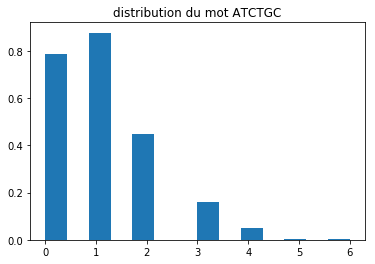

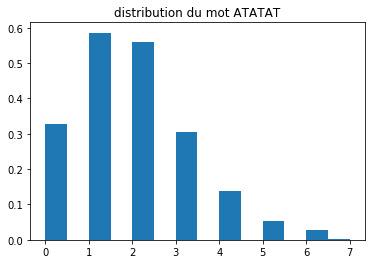

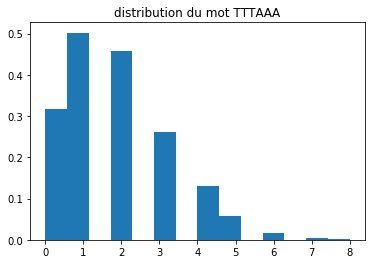

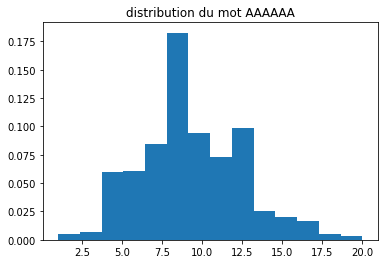

In [95]:
distribution(les_sequences[0] )

### Analyse:
les mots comme AAAAAA composés d'un ensemble de lettres non variés apparaisent plus souvent avec un nombre d'occurence plus grand. Les mots comme ATCTGC apparaissent bien moins souvent.

#### une fonction qui, à partir de la liste des comptages des mots de taille k et de la longueur de la séquence, calcule leur probabilité d’occurrence P(Nw ≥ nw) avec la formule analytique

In [112]:
from scipy.stats import poisson

def liste_probas_selon_comptage(comptages,k, l):
    probas = {}
    for i in comptages:
        probas[i] = 1 #p(x >= n) = 1 - p(x<n) = 1 - sum de i =0 a n (p(x=n_i))
        for j in range(comptages[i]+1):
            probas[i] -= poisson.pmf(j, comptages[i] )
    return probas

In [116]:
liste_probas_selon_comptage(comptage_obs(les_sequences[0], 2) , 2, len(les_sequences[0]) )

{0: 0.4708518244183919,
 1: 0.46089482722748837,
 2: 0.4617137602739814,
 3: 0.4689259781351937,
 4: 0.4642209359234707,
 5: 0.4423140445289233,
 6: 0.44485006438323227,
 7: 0.46089482722748837,
 8: 0.4585929528714395,
 9: 0.4585929528714395,
 10: 0.44485006438323227,
 11: 0.4580818216374588,
 12: 0.46849290772928875,
 13: 0.4564268248786233,
 14: 0.4628510812557838,
 15: 0.47343780146997555}

### Les mots de taille K qui apparaissent plus qu'attendu

In [114]:
sequencesPHO = []
for i in sequences:
        for j in i: 
            if j[1: 4] == "PHO":
                sequencesPHO = sequencesPHO + i[j]

In [164]:
def affiche_probas(k):
    dictio = liste_probas_selon_comptage(comptage_obs(sequencesPHO, k) , k, len(sequencesPHO))
    for i in dictio:
        dictio[i] -= proba_non_chevauchant(sequencesPHO, inverse(i, k))
    print("les sequences qui apparraissent plus qu'attendu")
    for i in range(10):
        maxi = max(dictio, key=lambda key: dictio[key])
        del dictio[maxi]
        
        print("".join([ ["A", "T", "C", "G"][d] for d in inverse(maxi, k)]))
        
    

In [165]:
affiche_probas(2)

les sequences qui apparraissent plus qu'attendu
CT
TC
CC
TT
GC
CG
GT
TG
AC
TA


c:\users\asus\appdata\local\programs\python\python35-32\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


In [166]:
affiche_probas(4)

c:\users\asus\appdata\local\programs\python\python35-32\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


les sequences qui apparraissent plus qu'attendu
AAAA
GGGG
ACAA
GGAG
AACA
AGGA
CAAA
ATAA
ACTA
GAGA


In [167]:
affiche_probas(6)

c:\users\asus\appdata\local\programs\python\python35-32\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


les sequences qui apparraissent plus qu'attendu
AAAAAA
AACAAA
TAACAA
GAGAGA
AAAAAC
AAAGGA
GGGGGG
CAACAA
GTAGTG
AACAAC


### Analyse
On deduit donc les séquences des sites de fixation à partir des mots qui apparaissent plus qu'attendu pour les mots de longueur k= 6